# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
listings_amsterdam = pd.read_csv("listings_Amsterdam.csv.gz",compression="gzip")
listings_amsterdam.head(5)
listings_amsterdam.columns
#listings_amsterdam.info()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [3]:
listings_amsterdam_summary = pd.read_csv("listings_Amsterdam_summary.csv.gz",compression="gzip")
listings_amsterdam_summary.head(5)
listings_amsterdam_summary.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
listings_amsterdam_reviews = pd.read_csv("reviews_Amsterdam.csv.gz",compression="gzip")
listings_amsterdam_reviews.head(5)

,listing_id,date
0,2818,2009-03-30
1,2818,2009-04-24
2,2818,2009-05-03
3,2818,2009-05-18
4,2818,2009-05-25


**1) Calculate how many reviews per year have the listings in total. Plot, the result.**

In [5]:
listings_amsterdam_reviews['date'] = pd.to_datetime(listings_amsterdam_reviews['date'], errors='coerce')
plt1 = listings_amsterdam_reviews['listing_id'].groupby(listings_amsterdam_reviews['date'].dt.year).agg({'count'})
plt1.head(5)

,count
date,
2009,12
2010,59
2011,593
2012,1941
2013,6791


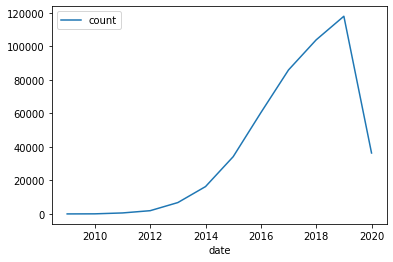

In [6]:
plt1.plot.line()

**2) Plot the number of listings per room-type.**

In [7]:
plt2 = listings_amsterdam_summary['id'].groupby(listings_amsterdam_summary['room_type']).agg({'count'})
plt2.head(5)

,count
room_type,
Entire home/apt,14664
Hotel room,134
Private room,3922
Shared room,62


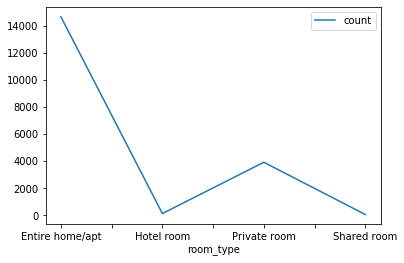

In [8]:
plt2.plot.line()

**3) Plot the number of bookings per property type.**

In [9]:
plt3 = listings_amsterdam['property_type'].value_counts()
plt3.head(5)

Entire apartment             11751
Private room in apartment     2311
Entire house                  1208
Entire townhouse               473
Private room in house          349
Name: property_type, dtype: int64

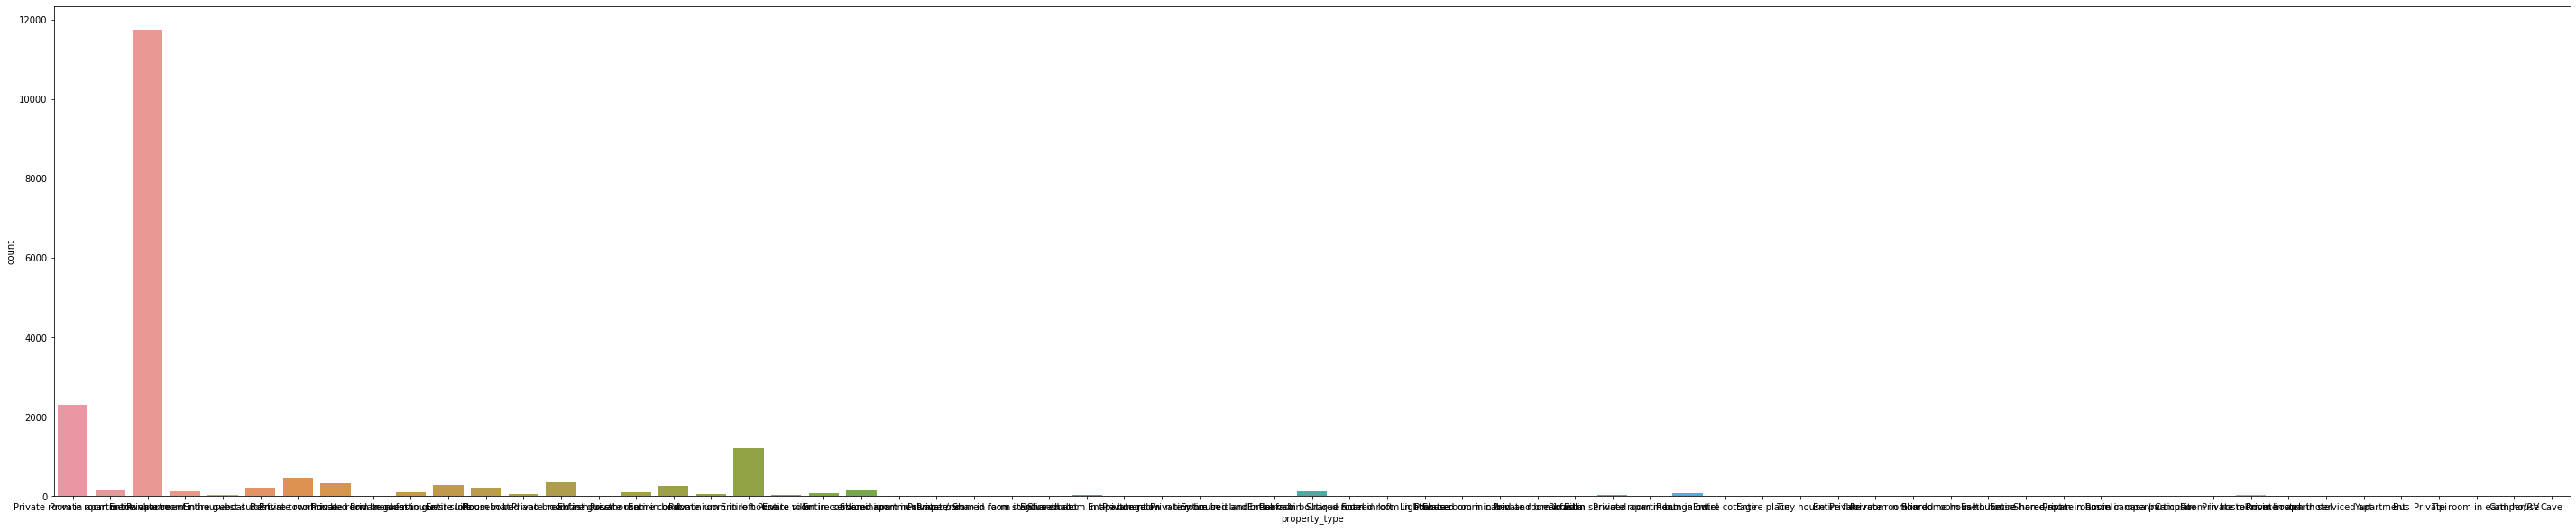

In [10]:
plt.figure(figsize=(50,10))
sns.countplot(listings_amsterdam['property_type'])

**4) Plot the average number of reviews per room-type.**

In [11]:
listings_amsterdam_summary
plt4 = listings_amsterdam_summary['id'].groupby(listings_amsterdam_summary['room_type']).agg({'mean'})
plt4.head(5)

,mean
room_type,
Entire home/apt,1.952089e+07
Hotel room,2.526871e+07
Private room,2.281972e+07
Shared room,2.405278e+07


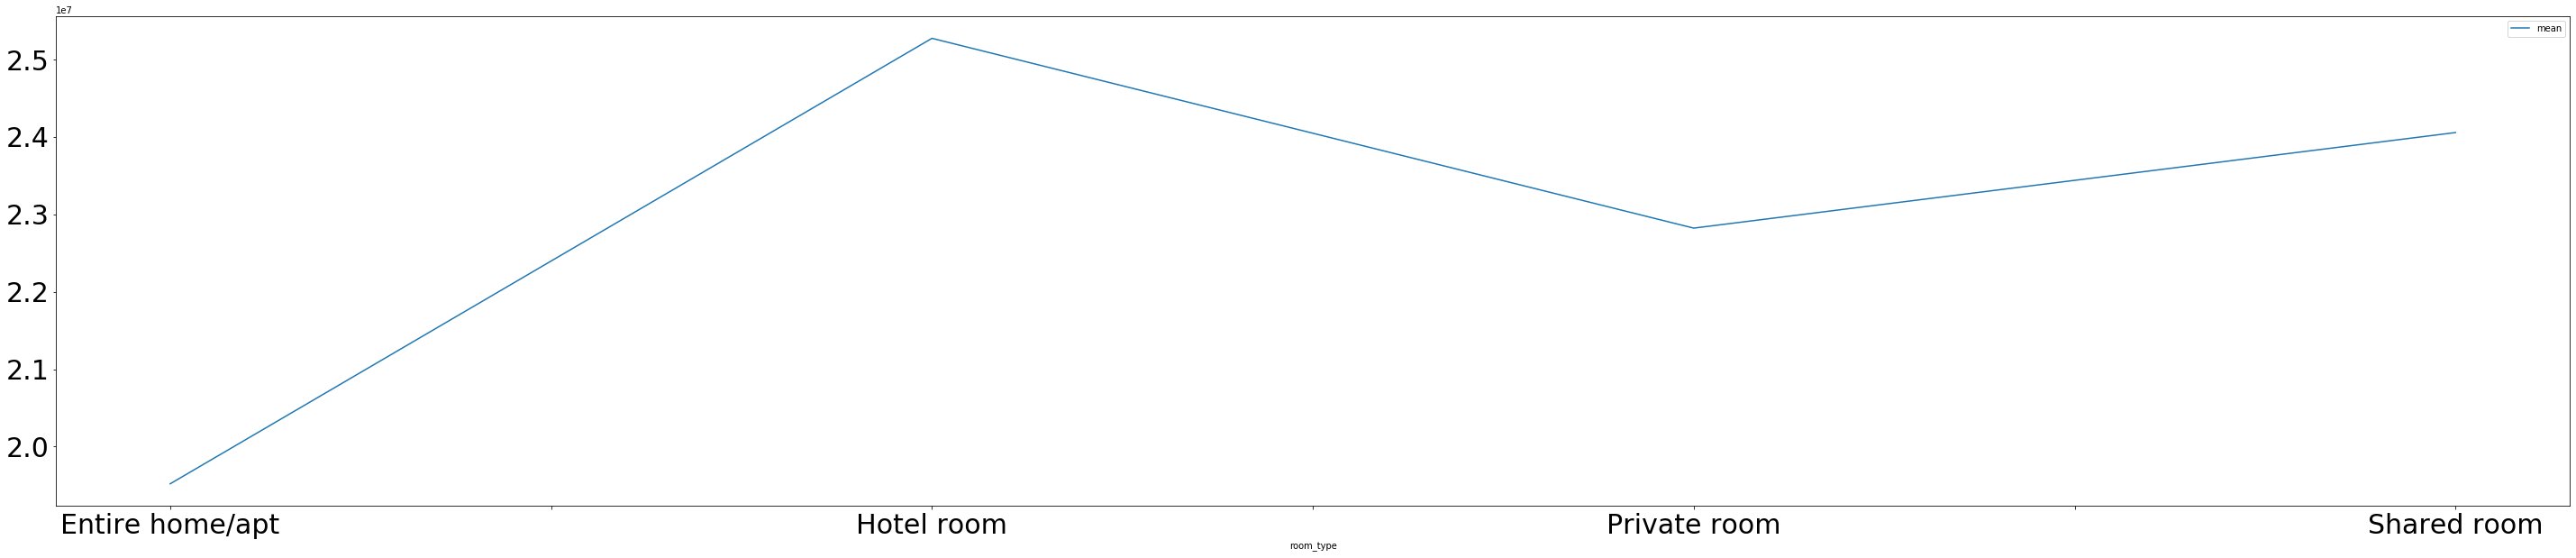

In [12]:
plt4.plot.line(figsize=(50,10),fontsize=(30))

**5) Calculate the total number of bookings per neighborhood and plot the top 10 in decreasing order.**

In [13]:
plt5 =listings_amsterdam_summary['id'].groupby(listings_amsterdam_summary['neighbourhood']).agg({'count'})
plt5['neighbourhood'] = plt5.index
plt5 = plt5.sort_values(by='count', ascending=False)
plt5 = plt5.head(10)
plt5

,count,neighbourhood
neighbourhood,,
De Baarsjes - Oud-West,3185,De Baarsjes - Oud-West
De Pijp - Rivierenbuurt,2353,De Pijp - Rivierenbuurt
Centrum-West,2028,Centrum-West
Centrum-Oost,1625,Centrum-Oost
Westerpark,1421,Westerpark
Zuid,1332,Zuid
Oud-Oost,1233,Oud-Oost
Bos en Lommer,1069,Bos en Lommer
Oostelijk Havengebied - Indische Buurt,905,Oostelijk Havengebied - Indische Buurt


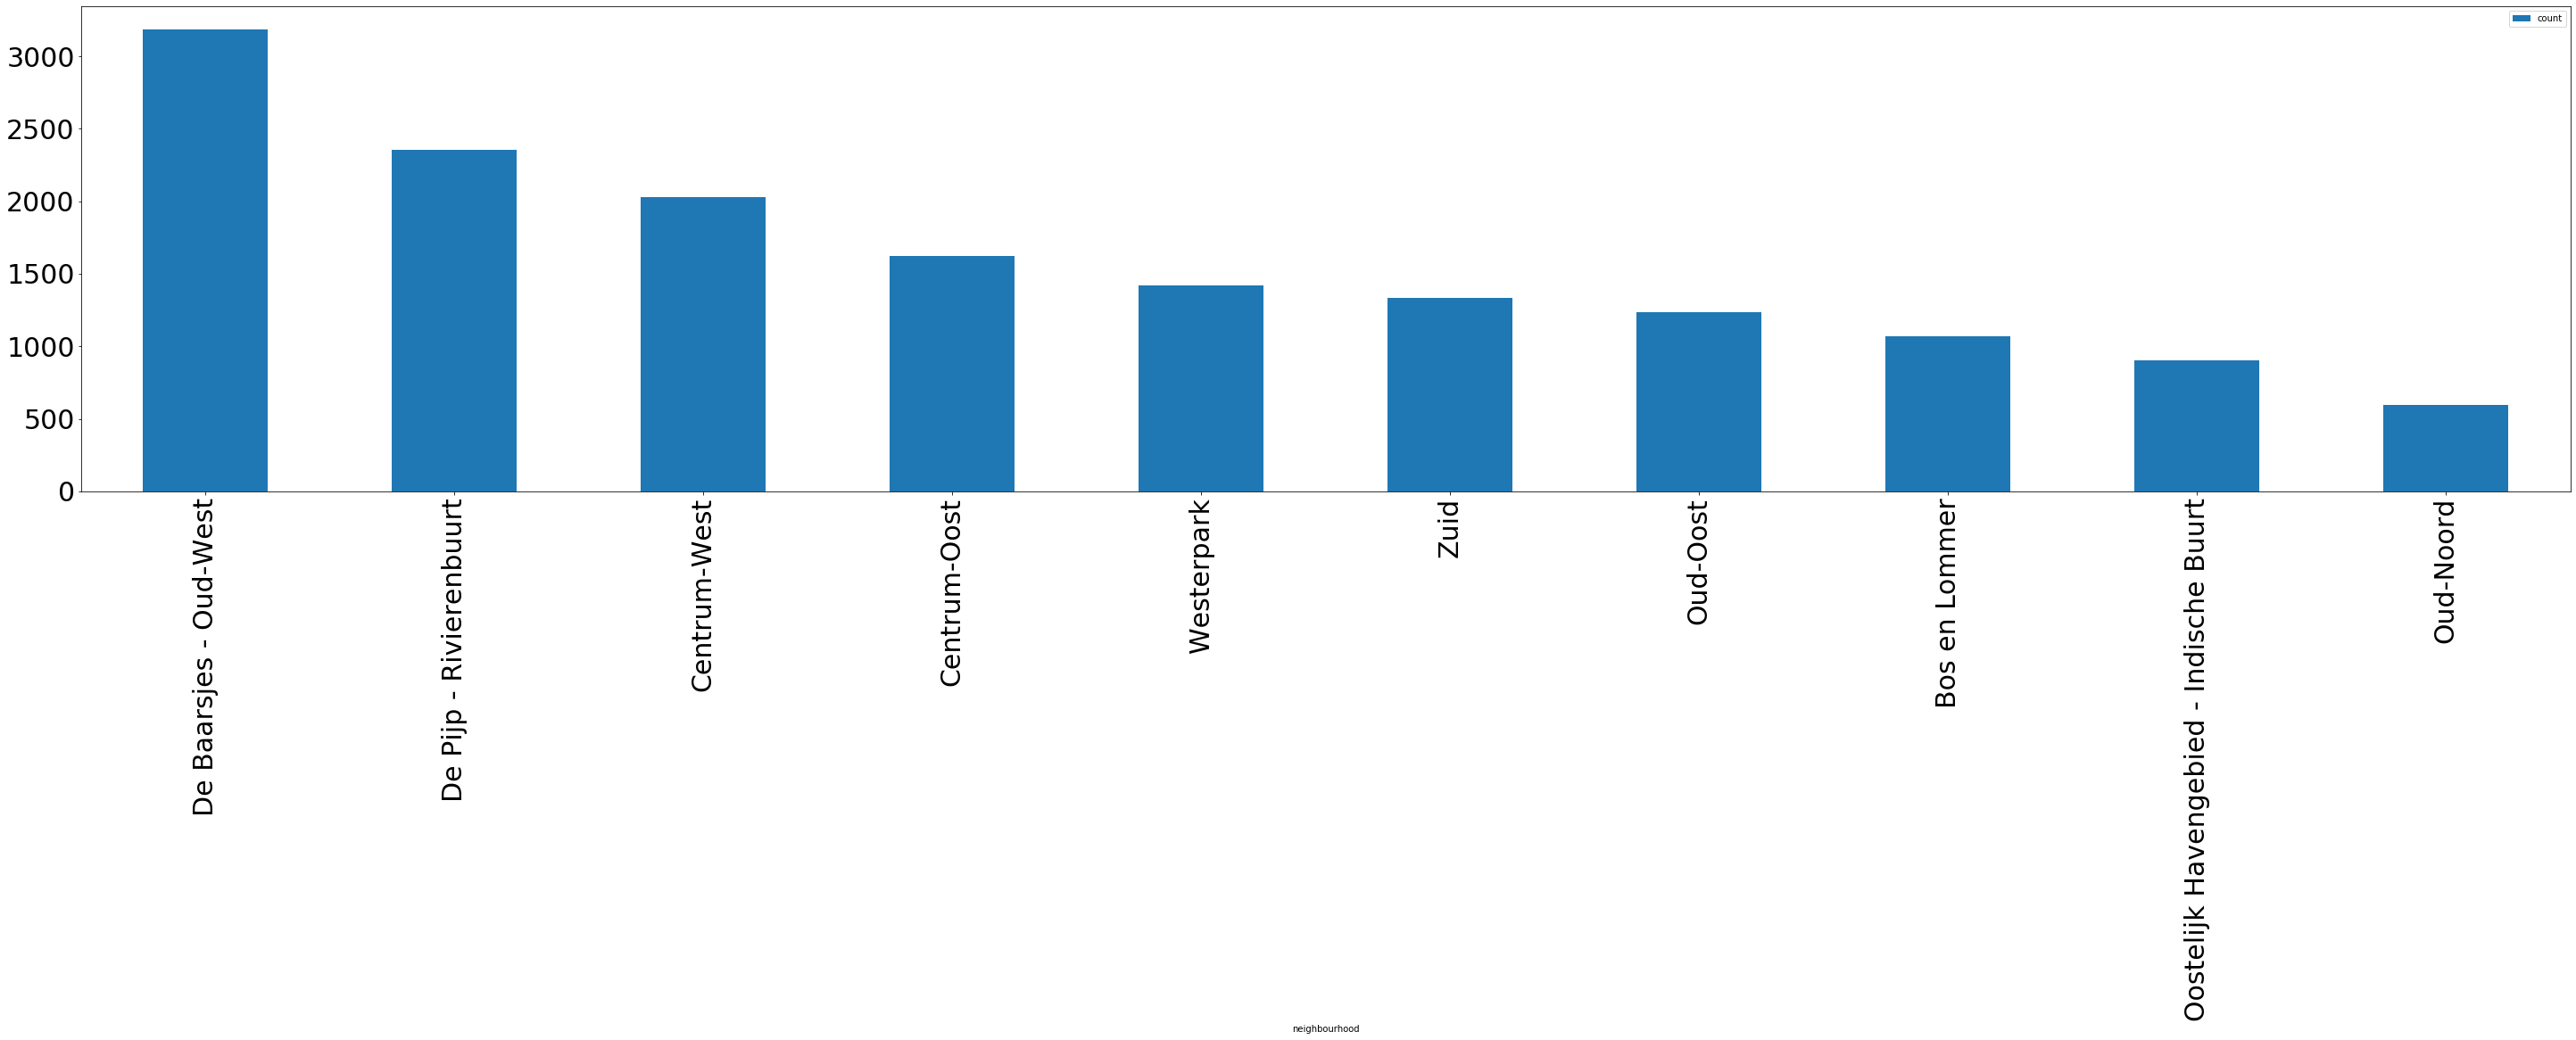

In [14]:
plt5.plot.bar(figsize=(50,10),fontsize=(30))

**6) Find the average number of listings per host and plot the distribution.**

In [15]:
len(listings_amsterdam_summary['host_id'].unique())
plt6 = listings_amsterdam_summary['host_id'].groupby(listings_amsterdam_summary['host_id']).agg({'mean'})
plt6.head(5)

,mean
host_id,
3159,3159
3592,3592
7924,7924
12085,12085
30390,30390


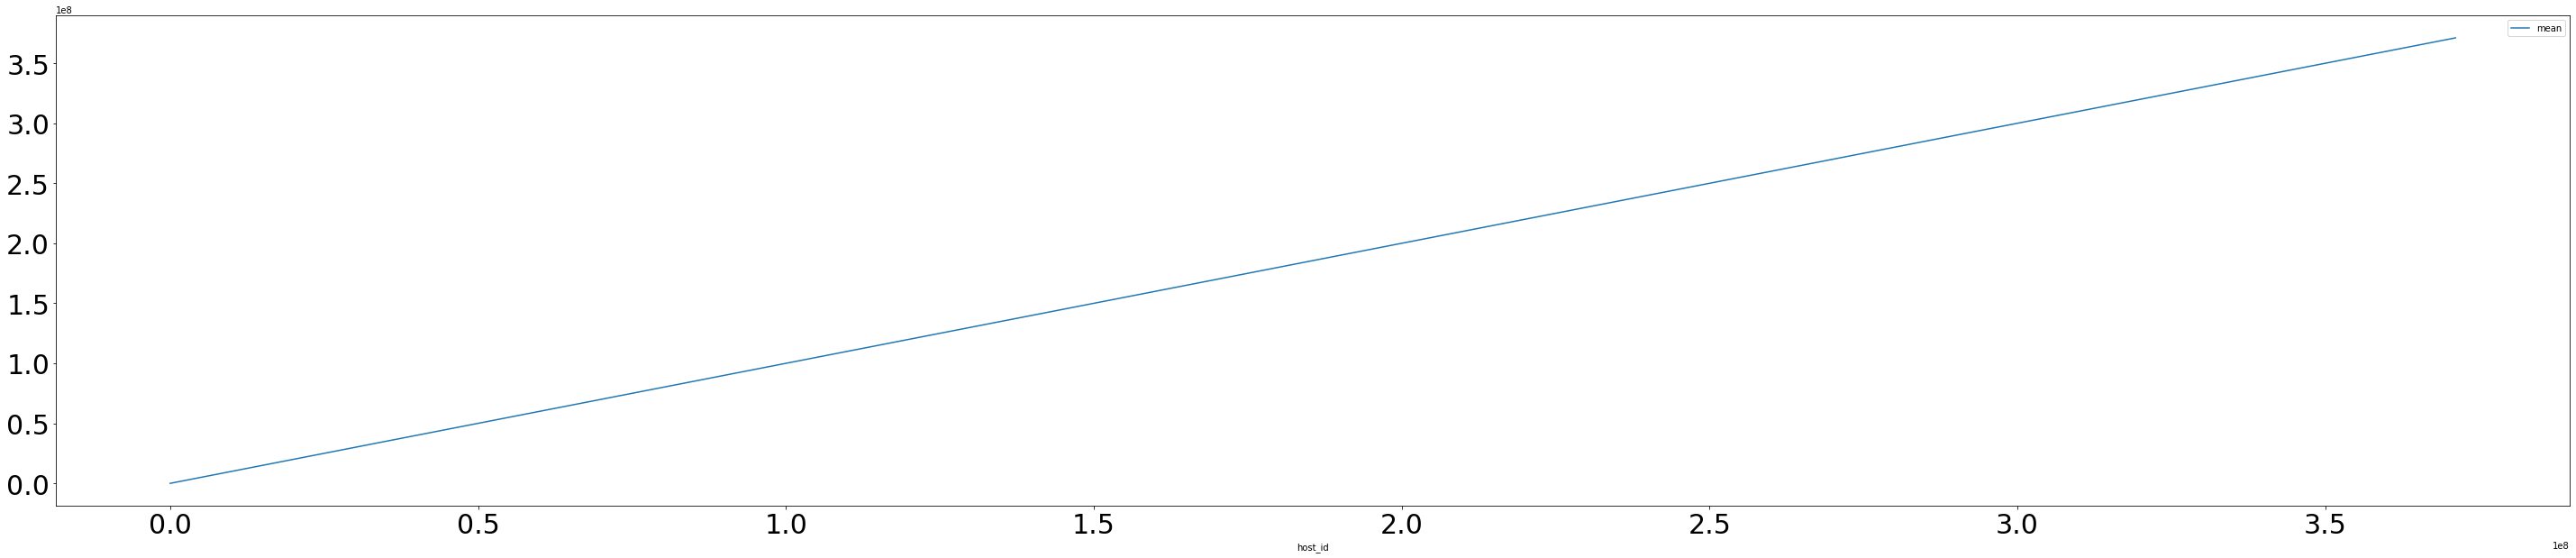

In [16]:
plt6.plot.line(figsize=(50,10),fontsize=(30))

**7) Calculate the total number of reviews for each listing and plot the distribution.**

In [17]:
listings_amsterdam['id'].unique()
plt7 = listings_amsterdam['number_of_reviews'].groupby(listings_amsterdam['id']).agg({'sum'})
plt7.head(5)

,sum
id,
2818,278
20168,340
25428,5
27886,219
28871,336


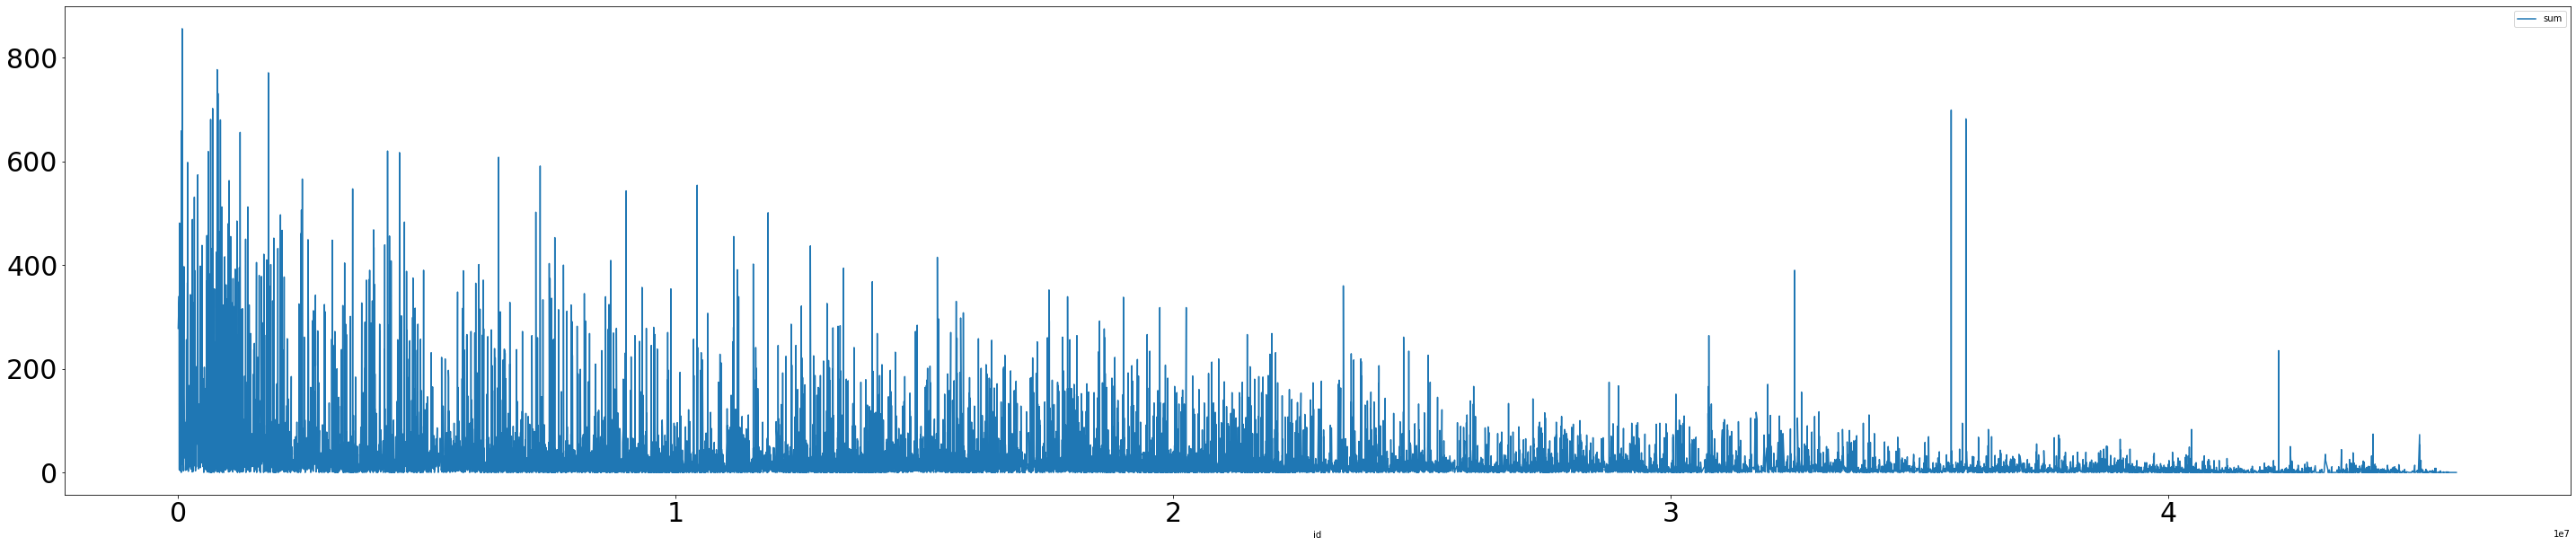

In [18]:
plt7.plot.line(figsize=(50,10),fontsize=(30))

**8) Calculate the total number of reviews per instant_bookable flag.**

In [19]:
listings_amsterdam['instant_bookable'].value_counts()

f    13796
t     4986
Name: instant_bookable, dtype: int64

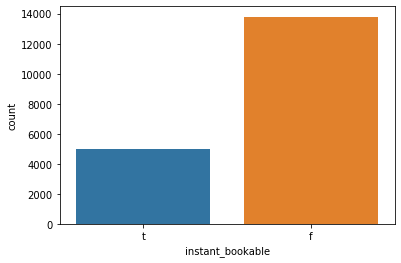

In [20]:
sns.countplot(listings_amsterdam['instant_bookable'])

**9) Find the 10 most common amenities and the 10 least frequent ones across the listings. Plot their counts.**

In [21]:
for i, l in enumerate(listings_amsterdam['amenities']):
    print("list",i,"is",type(l))

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 4 is <class 'str'>
list 5 is <class 'str'>
list 6 is <class 'str'>
list 7 is <class 'str'>
list 8 is <class 'str'>
list 9 is <class 'str'>
list 10 is <class 'str'>
list 11 is <class 'str'>
list 12 is <class 'str'>
list 13 is <class 'str'>
list 14 is <class 'str'>
list 15 is <class 'str'>
list 16 is <class 'str'>
list 17 is <class 'str'>
list 18 is <class 'str'>
list 19 is <class 'str'>
list 20 is <class 'str'>
list 21 is <class 'str'>
list 22 is <class 'str'>
list 23 is <class 'str'>
list 24 is <class 'str'>
list 25 is <class 'str'>
list 26 is <class 'str'>
list 27 is <class 'str'>
list 28 is <class 'str'>
list 29 is <class 'str'>
list 30 is <class 'str'>
list 31 is <class 'str'>
list 32 is <class 'str'>
list 33 is <class 'str'>
list 34 is <class 'str'>
list 35 is <class 'str'>
list 36 is <class 'str'>
list 37 is <class 'str'>
list 38 is <class 'str'>
list 39 is <class 'str'>
list 40 is

list 413 is <class 'str'>
list 414 is <class 'str'>
list 415 is <class 'str'>
list 416 is <class 'str'>
list 417 is <class 'str'>
list 418 is <class 'str'>
list 419 is <class 'str'>
list 420 is <class 'str'>
list 421 is <class 'str'>
list 422 is <class 'str'>
list 423 is <class 'str'>
list 424 is <class 'str'>
list 425 is <class 'str'>
list 426 is <class 'str'>
list 427 is <class 'str'>
list 428 is <class 'str'>
list 429 is <class 'str'>
list 430 is <class 'str'>
list 431 is <class 'str'>
list 432 is <class 'str'>
list 433 is <class 'str'>
list 434 is <class 'str'>
list 435 is <class 'str'>
list 436 is <class 'str'>
list 437 is <class 'str'>
list 438 is <class 'str'>
list 439 is <class 'str'>
list 440 is <class 'str'>
list 441 is <class 'str'>
list 442 is <class 'str'>
list 443 is <class 'str'>
list 444 is <class 'str'>
list 445 is <class 'str'>
list 446 is <class 'str'>
list 447 is <class 'str'>
list 448 is <class 'str'>
list 449 is <class 'str'>
list 450 is <class 'str'>
list 451 is 

list 1077 is <class 'str'>
list 1078 is <class 'str'>
list 1079 is <class 'str'>
list 1080 is <class 'str'>
list 1081 is <class 'str'>
list 1082 is <class 'str'>
list 1083 is <class 'str'>
list 1084 is <class 'str'>
list 1085 is <class 'str'>
list 1086 is <class 'str'>
list 1087 is <class 'str'>
list 1088 is <class 'str'>
list 1089 is <class 'str'>
list 1090 is <class 'str'>
list 1091 is <class 'str'>
list 1092 is <class 'str'>
list 1093 is <class 'str'>
list 1094 is <class 'str'>
list 1095 is <class 'str'>
list 1096 is <class 'str'>
list 1097 is <class 'str'>
list 1098 is <class 'str'>
list 1099 is <class 'str'>
list 1100 is <class 'str'>
list 1101 is <class 'str'>
list 1102 is <class 'str'>
list 1103 is <class 'str'>
list 1104 is <class 'str'>
list 1105 is <class 'str'>
list 1106 is <class 'str'>
list 1107 is <class 'str'>
list 1108 is <class 'str'>
list 1109 is <class 'str'>
list 1110 is <class 'str'>
list 1111 is <class 'str'>
list 1112 is <class 'str'>
list 1113 is <class 'str'>
l

list 1416 is <class 'str'>
list 1417 is <class 'str'>
list 1418 is <class 'str'>
list 1419 is <class 'str'>
list 1420 is <class 'str'>
list 1421 is <class 'str'>
list 1422 is <class 'str'>
list 1423 is <class 'str'>
list 1424 is <class 'str'>
list 1425 is <class 'str'>
list 1426 is <class 'str'>
list 1427 is <class 'str'>
list 1428 is <class 'str'>
list 1429 is <class 'str'>
list 1430 is <class 'str'>
list 1431 is <class 'str'>
list 1432 is <class 'str'>
list 1433 is <class 'str'>
list 1434 is <class 'str'>
list 1435 is <class 'str'>
list 1436 is <class 'str'>
list 1437 is <class 'str'>
list 1438 is <class 'str'>
list 1439 is <class 'str'>
list 1440 is <class 'str'>
list 1441 is <class 'str'>
list 1442 is <class 'str'>
list 1443 is <class 'str'>
list 1444 is <class 'str'>
list 1445 is <class 'str'>
list 1446 is <class 'str'>
list 1447 is <class 'str'>
list 1448 is <class 'str'>
list 1449 is <class 'str'>
list 1450 is <class 'str'>
list 1451 is <class 'str'>
list 1452 is <class 'str'>
l

list 1827 is <class 'str'>
list 1828 is <class 'str'>
list 1829 is <class 'str'>
list 1830 is <class 'str'>
list 1831 is <class 'str'>
list 1832 is <class 'str'>
list 1833 is <class 'str'>
list 1834 is <class 'str'>
list 1835 is <class 'str'>
list 1836 is <class 'str'>
list 1837 is <class 'str'>
list 1838 is <class 'str'>
list 1839 is <class 'str'>
list 1840 is <class 'str'>
list 1841 is <class 'str'>
list 1842 is <class 'str'>
list 1843 is <class 'str'>
list 1844 is <class 'str'>
list 1845 is <class 'str'>
list 1846 is <class 'str'>
list 1847 is <class 'str'>
list 1848 is <class 'str'>
list 1849 is <class 'str'>
list 1850 is <class 'str'>
list 1851 is <class 'str'>
list 1852 is <class 'str'>
list 1853 is <class 'str'>
list 1854 is <class 'str'>
list 1855 is <class 'str'>
list 1856 is <class 'str'>
list 1857 is <class 'str'>
list 1858 is <class 'str'>
list 1859 is <class 'str'>
list 1860 is <class 'str'>
list 1861 is <class 'str'>
list 1862 is <class 'str'>
list 1863 is <class 'str'>
l

list 2202 is <class 'str'>
list 2203 is <class 'str'>
list 2204 is <class 'str'>
list 2205 is <class 'str'>
list 2206 is <class 'str'>
list 2207 is <class 'str'>
list 2208 is <class 'str'>
list 2209 is <class 'str'>
list 2210 is <class 'str'>
list 2211 is <class 'str'>
list 2212 is <class 'str'>
list 2213 is <class 'str'>
list 2214 is <class 'str'>
list 2215 is <class 'str'>
list 2216 is <class 'str'>
list 2217 is <class 'str'>
list 2218 is <class 'str'>
list 2219 is <class 'str'>
list 2220 is <class 'str'>
list 2221 is <class 'str'>
list 2222 is <class 'str'>
list 2223 is <class 'str'>
list 2224 is <class 'str'>
list 2225 is <class 'str'>
list 2226 is <class 'str'>
list 2227 is <class 'str'>
list 2228 is <class 'str'>
list 2229 is <class 'str'>
list 2230 is <class 'str'>
list 2231 is <class 'str'>
list 2232 is <class 'str'>
list 2233 is <class 'str'>
list 2234 is <class 'str'>
list 2235 is <class 'str'>
list 2236 is <class 'str'>
list 2237 is <class 'str'>
list 2238 is <class 'str'>
l

list 2763 is <class 'str'>
list 2764 is <class 'str'>
list 2765 is <class 'str'>
list 2766 is <class 'str'>
list 2767 is <class 'str'>
list 2768 is <class 'str'>
list 2769 is <class 'str'>
list 2770 is <class 'str'>
list 2771 is <class 'str'>
list 2772 is <class 'str'>
list 2773 is <class 'str'>
list 2774 is <class 'str'>
list 2775 is <class 'str'>
list 2776 is <class 'str'>
list 2777 is <class 'str'>
list 2778 is <class 'str'>
list 2779 is <class 'str'>
list 2780 is <class 'str'>
list 2781 is <class 'str'>
list 2782 is <class 'str'>
list 2783 is <class 'str'>
list 2784 is <class 'str'>
list 2785 is <class 'str'>
list 2786 is <class 'str'>
list 2787 is <class 'str'>
list 2788 is <class 'str'>
list 2789 is <class 'str'>
list 2790 is <class 'str'>
list 2791 is <class 'str'>
list 2792 is <class 'str'>
list 2793 is <class 'str'>
list 2794 is <class 'str'>
list 2795 is <class 'str'>
list 2796 is <class 'str'>
list 2797 is <class 'str'>
list 2798 is <class 'str'>
list 2799 is <class 'str'>
l

list 3088 is <class 'str'>
list 3089 is <class 'str'>
list 3090 is <class 'str'>
list 3091 is <class 'str'>
list 3092 is <class 'str'>
list 3093 is <class 'str'>
list 3094 is <class 'str'>
list 3095 is <class 'str'>
list 3096 is <class 'str'>
list 3097 is <class 'str'>
list 3098 is <class 'str'>
list 3099 is <class 'str'>
list 3100 is <class 'str'>
list 3101 is <class 'str'>
list 3102 is <class 'str'>
list 3103 is <class 'str'>
list 3104 is <class 'str'>
list 3105 is <class 'str'>
list 3106 is <class 'str'>
list 3107 is <class 'str'>
list 3108 is <class 'str'>
list 3109 is <class 'str'>
list 3110 is <class 'str'>
list 3111 is <class 'str'>
list 3112 is <class 'str'>
list 3113 is <class 'str'>
list 3114 is <class 'str'>
list 3115 is <class 'str'>
list 3116 is <class 'str'>
list 3117 is <class 'str'>
list 3118 is <class 'str'>
list 3119 is <class 'str'>
list 3120 is <class 'str'>
list 3121 is <class 'str'>
list 3122 is <class 'str'>
list 3123 is <class 'str'>
list 3124 is <class 'str'>
l

list 3701 is <class 'str'>
list 3702 is <class 'str'>
list 3703 is <class 'str'>
list 3704 is <class 'str'>
list 3705 is <class 'str'>
list 3706 is <class 'str'>
list 3707 is <class 'str'>
list 3708 is <class 'str'>
list 3709 is <class 'str'>
list 3710 is <class 'str'>
list 3711 is <class 'str'>
list 3712 is <class 'str'>
list 3713 is <class 'str'>
list 3714 is <class 'str'>
list 3715 is <class 'str'>
list 3716 is <class 'str'>
list 3717 is <class 'str'>
list 3718 is <class 'str'>
list 3719 is <class 'str'>
list 3720 is <class 'str'>
list 3721 is <class 'str'>
list 3722 is <class 'str'>
list 3723 is <class 'str'>
list 3724 is <class 'str'>
list 3725 is <class 'str'>
list 3726 is <class 'str'>
list 3727 is <class 'str'>
list 3728 is <class 'str'>
list 3729 is <class 'str'>
list 3730 is <class 'str'>
list 3731 is <class 'str'>
list 3732 is <class 'str'>
list 3733 is <class 'str'>
list 3734 is <class 'str'>
list 3735 is <class 'str'>
list 3736 is <class 'str'>
list 3737 is <class 'str'>
l

list 4076 is <class 'str'>
list 4077 is <class 'str'>
list 4078 is <class 'str'>
list 4079 is <class 'str'>
list 4080 is <class 'str'>
list 4081 is <class 'str'>
list 4082 is <class 'str'>
list 4083 is <class 'str'>
list 4084 is <class 'str'>
list 4085 is <class 'str'>
list 4086 is <class 'str'>
list 4087 is <class 'str'>
list 4088 is <class 'str'>
list 4089 is <class 'str'>
list 4090 is <class 'str'>
list 4091 is <class 'str'>
list 4092 is <class 'str'>
list 4093 is <class 'str'>
list 4094 is <class 'str'>
list 4095 is <class 'str'>
list 4096 is <class 'str'>
list 4097 is <class 'str'>
list 4098 is <class 'str'>
list 4099 is <class 'str'>
list 4100 is <class 'str'>
list 4101 is <class 'str'>
list 4102 is <class 'str'>
list 4103 is <class 'str'>
list 4104 is <class 'str'>
list 4105 is <class 'str'>
list 4106 is <class 'str'>
list 4107 is <class 'str'>
list 4108 is <class 'str'>
list 4109 is <class 'str'>
list 4110 is <class 'str'>
list 4111 is <class 'str'>
list 4112 is <class 'str'>
l

list 4423 is <class 'str'>
list 4424 is <class 'str'>
list 4425 is <class 'str'>
list 4426 is <class 'str'>
list 4427 is <class 'str'>
list 4428 is <class 'str'>
list 4429 is <class 'str'>
list 4430 is <class 'str'>
list 4431 is <class 'str'>
list 4432 is <class 'str'>
list 4433 is <class 'str'>
list 4434 is <class 'str'>
list 4435 is <class 'str'>
list 4436 is <class 'str'>
list 4437 is <class 'str'>
list 4438 is <class 'str'>
list 4439 is <class 'str'>
list 4440 is <class 'str'>
list 4441 is <class 'str'>
list 4442 is <class 'str'>
list 4443 is <class 'str'>
list 4444 is <class 'str'>
list 4445 is <class 'str'>
list 4446 is <class 'str'>
list 4447 is <class 'str'>
list 4448 is <class 'str'>
list 4449 is <class 'str'>
list 4450 is <class 'str'>
list 4451 is <class 'str'>
list 4452 is <class 'str'>
list 4453 is <class 'str'>
list 4454 is <class 'str'>
list 4455 is <class 'str'>
list 4456 is <class 'str'>
list 4457 is <class 'str'>
list 4458 is <class 'str'>
list 4459 is <class 'str'>
l

list 4861 is <class 'str'>
list 4862 is <class 'str'>
list 4863 is <class 'str'>
list 4864 is <class 'str'>
list 4865 is <class 'str'>
list 4866 is <class 'str'>
list 4867 is <class 'str'>
list 4868 is <class 'str'>
list 4869 is <class 'str'>
list 4870 is <class 'str'>
list 4871 is <class 'str'>
list 4872 is <class 'str'>
list 4873 is <class 'str'>
list 4874 is <class 'str'>
list 4875 is <class 'str'>
list 4876 is <class 'str'>
list 4877 is <class 'str'>
list 4878 is <class 'str'>
list 4879 is <class 'str'>
list 4880 is <class 'str'>
list 4881 is <class 'str'>
list 4882 is <class 'str'>
list 4883 is <class 'str'>
list 4884 is <class 'str'>
list 4885 is <class 'str'>
list 4886 is <class 'str'>
list 4887 is <class 'str'>
list 4888 is <class 'str'>
list 4889 is <class 'str'>
list 4890 is <class 'str'>
list 4891 is <class 'str'>
list 4892 is <class 'str'>
list 4893 is <class 'str'>
list 4894 is <class 'str'>
list 4895 is <class 'str'>
list 4896 is <class 'str'>
list 4897 is <class 'str'>
l

list 5210 is <class 'str'>
list 5211 is <class 'str'>
list 5212 is <class 'str'>
list 5213 is <class 'str'>
list 5214 is <class 'str'>
list 5215 is <class 'str'>
list 5216 is <class 'str'>
list 5217 is <class 'str'>
list 5218 is <class 'str'>
list 5219 is <class 'str'>
list 5220 is <class 'str'>
list 5221 is <class 'str'>
list 5222 is <class 'str'>
list 5223 is <class 'str'>
list 5224 is <class 'str'>
list 5225 is <class 'str'>
list 5226 is <class 'str'>
list 5227 is <class 'str'>
list 5228 is <class 'str'>
list 5229 is <class 'str'>
list 5230 is <class 'str'>
list 5231 is <class 'str'>
list 5232 is <class 'str'>
list 5233 is <class 'str'>
list 5234 is <class 'str'>
list 5235 is <class 'str'>
list 5236 is <class 'str'>
list 5237 is <class 'str'>
list 5238 is <class 'str'>
list 5239 is <class 'str'>
list 5240 is <class 'str'>
list 5241 is <class 'str'>
list 5242 is <class 'str'>
list 5243 is <class 'str'>
list 5244 is <class 'str'>
list 5245 is <class 'str'>
list 5246 is <class 'str'>
l

list 5580 is <class 'str'>
list 5581 is <class 'str'>
list 5582 is <class 'str'>
list 5583 is <class 'str'>
list 5584 is <class 'str'>
list 5585 is <class 'str'>
list 5586 is <class 'str'>
list 5587 is <class 'str'>
list 5588 is <class 'str'>
list 5589 is <class 'str'>
list 5590 is <class 'str'>
list 5591 is <class 'str'>
list 5592 is <class 'str'>
list 5593 is <class 'str'>
list 5594 is <class 'str'>
list 5595 is <class 'str'>
list 5596 is <class 'str'>
list 5597 is <class 'str'>
list 5598 is <class 'str'>
list 5599 is <class 'str'>
list 5600 is <class 'str'>
list 5601 is <class 'str'>
list 5602 is <class 'str'>
list 5603 is <class 'str'>
list 5604 is <class 'str'>
list 5605 is <class 'str'>
list 5606 is <class 'str'>
list 5607 is <class 'str'>
list 5608 is <class 'str'>
list 5609 is <class 'str'>
list 5610 is <class 'str'>
list 5611 is <class 'str'>
list 5612 is <class 'str'>
list 5613 is <class 'str'>
list 5614 is <class 'str'>
list 5615 is <class 'str'>
list 5616 is <class 'str'>
l

list 5904 is <class 'str'>
list 5905 is <class 'str'>
list 5906 is <class 'str'>
list 5907 is <class 'str'>
list 5908 is <class 'str'>
list 5909 is <class 'str'>
list 5910 is <class 'str'>
list 5911 is <class 'str'>
list 5912 is <class 'str'>
list 5913 is <class 'str'>
list 5914 is <class 'str'>
list 5915 is <class 'str'>
list 5916 is <class 'str'>
list 5917 is <class 'str'>
list 5918 is <class 'str'>
list 5919 is <class 'str'>
list 5920 is <class 'str'>
list 5921 is <class 'str'>
list 5922 is <class 'str'>
list 5923 is <class 'str'>
list 5924 is <class 'str'>
list 5925 is <class 'str'>
list 5926 is <class 'str'>
list 5927 is <class 'str'>
list 5928 is <class 'str'>
list 5929 is <class 'str'>
list 5930 is <class 'str'>
list 5931 is <class 'str'>
list 5932 is <class 'str'>
list 5933 is <class 'str'>
list 5934 is <class 'str'>
list 5935 is <class 'str'>
list 5936 is <class 'str'>
list 5937 is <class 'str'>
list 5938 is <class 'str'>
list 5939 is <class 'str'>
list 5940 is <class 'str'>
l

list 6233 is <class 'str'>
list 6234 is <class 'str'>
list 6235 is <class 'str'>
list 6236 is <class 'str'>
list 6237 is <class 'str'>
list 6238 is <class 'str'>
list 6239 is <class 'str'>
list 6240 is <class 'str'>
list 6241 is <class 'str'>
list 6242 is <class 'str'>
list 6243 is <class 'str'>
list 6244 is <class 'str'>
list 6245 is <class 'str'>
list 6246 is <class 'str'>
list 6247 is <class 'str'>
list 6248 is <class 'str'>
list 6249 is <class 'str'>
list 6250 is <class 'str'>
list 6251 is <class 'str'>
list 6252 is <class 'str'>
list 6253 is <class 'str'>
list 6254 is <class 'str'>
list 6255 is <class 'str'>
list 6256 is <class 'str'>
list 6257 is <class 'str'>
list 6258 is <class 'str'>
list 6259 is <class 'str'>
list 6260 is <class 'str'>
list 6261 is <class 'str'>
list 6262 is <class 'str'>
list 6263 is <class 'str'>
list 6264 is <class 'str'>
list 6265 is <class 'str'>
list 6266 is <class 'str'>
list 6267 is <class 'str'>
list 6268 is <class 'str'>
list 6269 is <class 'str'>
l

list 6685 is <class 'str'>
list 6686 is <class 'str'>
list 6687 is <class 'str'>
list 6688 is <class 'str'>
list 6689 is <class 'str'>
list 6690 is <class 'str'>
list 6691 is <class 'str'>
list 6692 is <class 'str'>
list 6693 is <class 'str'>
list 6694 is <class 'str'>
list 6695 is <class 'str'>
list 6696 is <class 'str'>
list 6697 is <class 'str'>
list 6698 is <class 'str'>
list 6699 is <class 'str'>
list 6700 is <class 'str'>
list 6701 is <class 'str'>
list 6702 is <class 'str'>
list 6703 is <class 'str'>
list 6704 is <class 'str'>
list 6705 is <class 'str'>
list 6706 is <class 'str'>
list 6707 is <class 'str'>
list 6708 is <class 'str'>
list 6709 is <class 'str'>
list 6710 is <class 'str'>
list 6711 is <class 'str'>
list 6712 is <class 'str'>
list 6713 is <class 'str'>
list 6714 is <class 'str'>
list 6715 is <class 'str'>
list 6716 is <class 'str'>
list 6717 is <class 'str'>
list 6718 is <class 'str'>
list 6719 is <class 'str'>
list 6720 is <class 'str'>
list 6721 is <class 'str'>
l

list 7129 is <class 'str'>
list 7130 is <class 'str'>
list 7131 is <class 'str'>
list 7132 is <class 'str'>
list 7133 is <class 'str'>
list 7134 is <class 'str'>
list 7135 is <class 'str'>
list 7136 is <class 'str'>
list 7137 is <class 'str'>
list 7138 is <class 'str'>
list 7139 is <class 'str'>
list 7140 is <class 'str'>
list 7141 is <class 'str'>
list 7142 is <class 'str'>
list 7143 is <class 'str'>
list 7144 is <class 'str'>
list 7145 is <class 'str'>
list 7146 is <class 'str'>
list 7147 is <class 'str'>
list 7148 is <class 'str'>
list 7149 is <class 'str'>
list 7150 is <class 'str'>
list 7151 is <class 'str'>
list 7152 is <class 'str'>
list 7153 is <class 'str'>
list 7154 is <class 'str'>
list 7155 is <class 'str'>
list 7156 is <class 'str'>
list 7157 is <class 'str'>
list 7158 is <class 'str'>
list 7159 is <class 'str'>
list 7160 is <class 'str'>
list 7161 is <class 'str'>
list 7162 is <class 'str'>
list 7163 is <class 'str'>
list 7164 is <class 'str'>
list 7165 is <class 'str'>
l

list 7473 is <class 'str'>
list 7474 is <class 'str'>
list 7475 is <class 'str'>
list 7476 is <class 'str'>
list 7477 is <class 'str'>
list 7478 is <class 'str'>
list 7479 is <class 'str'>
list 7480 is <class 'str'>
list 7481 is <class 'str'>
list 7482 is <class 'str'>
list 7483 is <class 'str'>
list 7484 is <class 'str'>
list 7485 is <class 'str'>
list 7486 is <class 'str'>
list 7487 is <class 'str'>
list 7488 is <class 'str'>
list 7489 is <class 'str'>
list 7490 is <class 'str'>
list 7491 is <class 'str'>
list 7492 is <class 'str'>
list 7493 is <class 'str'>
list 7494 is <class 'str'>
list 7495 is <class 'str'>
list 7496 is <class 'str'>
list 7497 is <class 'str'>
list 7498 is <class 'str'>
list 7499 is <class 'str'>
list 7500 is <class 'str'>
list 7501 is <class 'str'>
list 7502 is <class 'str'>
list 7503 is <class 'str'>
list 7504 is <class 'str'>
list 7505 is <class 'str'>
list 7506 is <class 'str'>
list 7507 is <class 'str'>
list 7508 is <class 'str'>
list 7509 is <class 'str'>
l

list 8200 is <class 'str'>
list 8201 is <class 'str'>
list 8202 is <class 'str'>
list 8203 is <class 'str'>
list 8204 is <class 'str'>
list 8205 is <class 'str'>
list 8206 is <class 'str'>
list 8207 is <class 'str'>
list 8208 is <class 'str'>
list 8209 is <class 'str'>
list 8210 is <class 'str'>
list 8211 is <class 'str'>
list 8212 is <class 'str'>
list 8213 is <class 'str'>
list 8214 is <class 'str'>
list 8215 is <class 'str'>
list 8216 is <class 'str'>
list 8217 is <class 'str'>
list 8218 is <class 'str'>
list 8219 is <class 'str'>
list 8220 is <class 'str'>
list 8221 is <class 'str'>
list 8222 is <class 'str'>
list 8223 is <class 'str'>
list 8224 is <class 'str'>
list 8225 is <class 'str'>
list 8226 is <class 'str'>
list 8227 is <class 'str'>
list 8228 is <class 'str'>
list 8229 is <class 'str'>
list 8230 is <class 'str'>
list 8231 is <class 'str'>
list 8232 is <class 'str'>
list 8233 is <class 'str'>
list 8234 is <class 'str'>
list 8235 is <class 'str'>
list 8236 is <class 'str'>
l

list 8523 is <class 'str'>
list 8524 is <class 'str'>
list 8525 is <class 'str'>
list 8526 is <class 'str'>
list 8527 is <class 'str'>
list 8528 is <class 'str'>
list 8529 is <class 'str'>
list 8530 is <class 'str'>
list 8531 is <class 'str'>
list 8532 is <class 'str'>
list 8533 is <class 'str'>
list 8534 is <class 'str'>
list 8535 is <class 'str'>
list 8536 is <class 'str'>
list 8537 is <class 'str'>
list 8538 is <class 'str'>
list 8539 is <class 'str'>
list 8540 is <class 'str'>
list 8541 is <class 'str'>
list 8542 is <class 'str'>
list 8543 is <class 'str'>
list 8544 is <class 'str'>
list 8545 is <class 'str'>
list 8546 is <class 'str'>
list 8547 is <class 'str'>
list 8548 is <class 'str'>
list 8549 is <class 'str'>
list 8550 is <class 'str'>
list 8551 is <class 'str'>
list 8552 is <class 'str'>
list 8553 is <class 'str'>
list 8554 is <class 'str'>
list 8555 is <class 'str'>
list 8556 is <class 'str'>
list 8557 is <class 'str'>
list 8558 is <class 'str'>
list 8559 is <class 'str'>
l

list 8857 is <class 'str'>
list 8858 is <class 'str'>
list 8859 is <class 'str'>
list 8860 is <class 'str'>
list 8861 is <class 'str'>
list 8862 is <class 'str'>
list 8863 is <class 'str'>
list 8864 is <class 'str'>
list 8865 is <class 'str'>
list 8866 is <class 'str'>
list 8867 is <class 'str'>
list 8868 is <class 'str'>
list 8869 is <class 'str'>
list 8870 is <class 'str'>
list 8871 is <class 'str'>
list 8872 is <class 'str'>
list 8873 is <class 'str'>
list 8874 is <class 'str'>
list 8875 is <class 'str'>
list 8876 is <class 'str'>
list 8877 is <class 'str'>
list 8878 is <class 'str'>
list 8879 is <class 'str'>
list 8880 is <class 'str'>
list 8881 is <class 'str'>
list 8882 is <class 'str'>
list 8883 is <class 'str'>
list 8884 is <class 'str'>
list 8885 is <class 'str'>
list 8886 is <class 'str'>
list 8887 is <class 'str'>
list 8888 is <class 'str'>
list 8889 is <class 'str'>
list 8890 is <class 'str'>
list 8891 is <class 'str'>
list 8892 is <class 'str'>
list 8893 is <class 'str'>
l

list 9254 is <class 'str'>
list 9255 is <class 'str'>
list 9256 is <class 'str'>
list 9257 is <class 'str'>
list 9258 is <class 'str'>
list 9259 is <class 'str'>
list 9260 is <class 'str'>
list 9261 is <class 'str'>
list 9262 is <class 'str'>
list 9263 is <class 'str'>
list 9264 is <class 'str'>
list 9265 is <class 'str'>
list 9266 is <class 'str'>
list 9267 is <class 'str'>
list 9268 is <class 'str'>
list 9269 is <class 'str'>
list 9270 is <class 'str'>
list 9271 is <class 'str'>
list 9272 is <class 'str'>
list 9273 is <class 'str'>
list 9274 is <class 'str'>
list 9275 is <class 'str'>
list 9276 is <class 'str'>
list 9277 is <class 'str'>
list 9278 is <class 'str'>
list 9279 is <class 'str'>
list 9280 is <class 'str'>
list 9281 is <class 'str'>
list 9282 is <class 'str'>
list 9283 is <class 'str'>
list 9284 is <class 'str'>
list 9285 is <class 'str'>
list 9286 is <class 'str'>
list 9287 is <class 'str'>
list 9288 is <class 'str'>
list 9289 is <class 'str'>
list 9290 is <class 'str'>
l

list 9574 is <class 'str'>
list 9575 is <class 'str'>
list 9576 is <class 'str'>
list 9577 is <class 'str'>
list 9578 is <class 'str'>
list 9579 is <class 'str'>
list 9580 is <class 'str'>
list 9581 is <class 'str'>
list 9582 is <class 'str'>
list 9583 is <class 'str'>
list 9584 is <class 'str'>
list 9585 is <class 'str'>
list 9586 is <class 'str'>
list 9587 is <class 'str'>
list 9588 is <class 'str'>
list 9589 is <class 'str'>
list 9590 is <class 'str'>
list 9591 is <class 'str'>
list 9592 is <class 'str'>
list 9593 is <class 'str'>
list 9594 is <class 'str'>
list 9595 is <class 'str'>
list 9596 is <class 'str'>
list 9597 is <class 'str'>
list 9598 is <class 'str'>
list 9599 is <class 'str'>
list 9600 is <class 'str'>
list 9601 is <class 'str'>
list 9602 is <class 'str'>
list 9603 is <class 'str'>
list 9604 is <class 'str'>
list 9605 is <class 'str'>
list 9606 is <class 'str'>
list 9607 is <class 'str'>
list 9608 is <class 'str'>
list 9609 is <class 'str'>
list 9610 is <class 'str'>
l

list 10173 is <class 'str'>
list 10174 is <class 'str'>
list 10175 is <class 'str'>
list 10176 is <class 'str'>
list 10177 is <class 'str'>
list 10178 is <class 'str'>
list 10179 is <class 'str'>
list 10180 is <class 'str'>
list 10181 is <class 'str'>
list 10182 is <class 'str'>
list 10183 is <class 'str'>
list 10184 is <class 'str'>
list 10185 is <class 'str'>
list 10186 is <class 'str'>
list 10187 is <class 'str'>
list 10188 is <class 'str'>
list 10189 is <class 'str'>
list 10190 is <class 'str'>
list 10191 is <class 'str'>
list 10192 is <class 'str'>
list 10193 is <class 'str'>
list 10194 is <class 'str'>
list 10195 is <class 'str'>
list 10196 is <class 'str'>
list 10197 is <class 'str'>
list 10198 is <class 'str'>
list 10199 is <class 'str'>
list 10200 is <class 'str'>
list 10201 is <class 'str'>
list 10202 is <class 'str'>
list 10203 is <class 'str'>
list 10204 is <class 'str'>
list 10205 is <class 'str'>
list 10206 is <class 'str'>
list 10207 is <class 'str'>
list 10208 is <class

list 10584 is <class 'str'>
list 10585 is <class 'str'>
list 10586 is <class 'str'>
list 10587 is <class 'str'>
list 10588 is <class 'str'>
list 10589 is <class 'str'>
list 10590 is <class 'str'>
list 10591 is <class 'str'>
list 10592 is <class 'str'>
list 10593 is <class 'str'>
list 10594 is <class 'str'>
list 10595 is <class 'str'>
list 10596 is <class 'str'>
list 10597 is <class 'str'>
list 10598 is <class 'str'>
list 10599 is <class 'str'>
list 10600 is <class 'str'>
list 10601 is <class 'str'>
list 10602 is <class 'str'>
list 10603 is <class 'str'>
list 10604 is <class 'str'>
list 10605 is <class 'str'>
list 10606 is <class 'str'>
list 10607 is <class 'str'>
list 10608 is <class 'str'>
list 10609 is <class 'str'>
list 10610 is <class 'str'>
list 10611 is <class 'str'>
list 10612 is <class 'str'>
list 10613 is <class 'str'>
list 10614 is <class 'str'>
list 10615 is <class 'str'>
list 10616 is <class 'str'>
list 10617 is <class 'str'>
list 10618 is <class 'str'>
list 10619 is <class

list 10949 is <class 'str'>
list 10950 is <class 'str'>
list 10951 is <class 'str'>
list 10952 is <class 'str'>
list 10953 is <class 'str'>
list 10954 is <class 'str'>
list 10955 is <class 'str'>
list 10956 is <class 'str'>
list 10957 is <class 'str'>
list 10958 is <class 'str'>
list 10959 is <class 'str'>
list 10960 is <class 'str'>
list 10961 is <class 'str'>
list 10962 is <class 'str'>
list 10963 is <class 'str'>
list 10964 is <class 'str'>
list 10965 is <class 'str'>
list 10966 is <class 'str'>
list 10967 is <class 'str'>
list 10968 is <class 'str'>
list 10969 is <class 'str'>
list 10970 is <class 'str'>
list 10971 is <class 'str'>
list 10972 is <class 'str'>
list 10973 is <class 'str'>
list 10974 is <class 'str'>
list 10975 is <class 'str'>
list 10976 is <class 'str'>
list 10977 is <class 'str'>
list 10978 is <class 'str'>
list 10979 is <class 'str'>
list 10980 is <class 'str'>
list 10981 is <class 'str'>
list 10982 is <class 'str'>
list 10983 is <class 'str'>
list 10984 is <class

list 11260 is <class 'str'>
list 11261 is <class 'str'>
list 11262 is <class 'str'>
list 11263 is <class 'str'>
list 11264 is <class 'str'>
list 11265 is <class 'str'>
list 11266 is <class 'str'>
list 11267 is <class 'str'>
list 11268 is <class 'str'>
list 11269 is <class 'str'>
list 11270 is <class 'str'>
list 11271 is <class 'str'>
list 11272 is <class 'str'>
list 11273 is <class 'str'>
list 11274 is <class 'str'>
list 11275 is <class 'str'>
list 11276 is <class 'str'>
list 11277 is <class 'str'>
list 11278 is <class 'str'>
list 11279 is <class 'str'>
list 11280 is <class 'str'>
list 11281 is <class 'str'>
list 11282 is <class 'str'>
list 11283 is <class 'str'>
list 11284 is <class 'str'>
list 11285 is <class 'str'>
list 11286 is <class 'str'>
list 11287 is <class 'str'>
list 11288 is <class 'str'>
list 11289 is <class 'str'>
list 11290 is <class 'str'>
list 11291 is <class 'str'>
list 11292 is <class 'str'>
list 11293 is <class 'str'>
list 11294 is <class 'str'>
list 11295 is <class

list 11693 is <class 'str'>
list 11694 is <class 'str'>
list 11695 is <class 'str'>
list 11696 is <class 'str'>
list 11697 is <class 'str'>
list 11698 is <class 'str'>
list 11699 is <class 'str'>
list 11700 is <class 'str'>
list 11701 is <class 'str'>
list 11702 is <class 'str'>
list 11703 is <class 'str'>
list 11704 is <class 'str'>
list 11705 is <class 'str'>
list 11706 is <class 'str'>
list 11707 is <class 'str'>
list 11708 is <class 'str'>
list 11709 is <class 'str'>
list 11710 is <class 'str'>
list 11711 is <class 'str'>
list 11712 is <class 'str'>
list 11713 is <class 'str'>
list 11714 is <class 'str'>
list 11715 is <class 'str'>
list 11716 is <class 'str'>
list 11717 is <class 'str'>
list 11718 is <class 'str'>
list 11719 is <class 'str'>
list 11720 is <class 'str'>
list 11721 is <class 'str'>
list 11722 is <class 'str'>
list 11723 is <class 'str'>
list 11724 is <class 'str'>
list 11725 is <class 'str'>
list 11726 is <class 'str'>
list 11727 is <class 'str'>
list 11728 is <class

list 12061 is <class 'str'>
list 12062 is <class 'str'>
list 12063 is <class 'str'>
list 12064 is <class 'str'>
list 12065 is <class 'str'>
list 12066 is <class 'str'>
list 12067 is <class 'str'>
list 12068 is <class 'str'>
list 12069 is <class 'str'>
list 12070 is <class 'str'>
list 12071 is <class 'str'>
list 12072 is <class 'str'>
list 12073 is <class 'str'>
list 12074 is <class 'str'>
list 12075 is <class 'str'>
list 12076 is <class 'str'>
list 12077 is <class 'str'>
list 12078 is <class 'str'>
list 12079 is <class 'str'>
list 12080 is <class 'str'>
list 12081 is <class 'str'>
list 12082 is <class 'str'>
list 12083 is <class 'str'>
list 12084 is <class 'str'>
list 12085 is <class 'str'>
list 12086 is <class 'str'>
list 12087 is <class 'str'>
list 12088 is <class 'str'>
list 12089 is <class 'str'>
list 12090 is <class 'str'>
list 12091 is <class 'str'>
list 12092 is <class 'str'>
list 12093 is <class 'str'>
list 12094 is <class 'str'>
list 12095 is <class 'str'>
list 12096 is <class

list 12521 is <class 'str'>
list 12522 is <class 'str'>
list 12523 is <class 'str'>
list 12524 is <class 'str'>
list 12525 is <class 'str'>
list 12526 is <class 'str'>
list 12527 is <class 'str'>
list 12528 is <class 'str'>
list 12529 is <class 'str'>
list 12530 is <class 'str'>
list 12531 is <class 'str'>
list 12532 is <class 'str'>
list 12533 is <class 'str'>
list 12534 is <class 'str'>
list 12535 is <class 'str'>
list 12536 is <class 'str'>
list 12537 is <class 'str'>
list 12538 is <class 'str'>
list 12539 is <class 'str'>
list 12540 is <class 'str'>
list 12541 is <class 'str'>
list 12542 is <class 'str'>
list 12543 is <class 'str'>
list 12544 is <class 'str'>
list 12545 is <class 'str'>
list 12546 is <class 'str'>
list 12547 is <class 'str'>
list 12548 is <class 'str'>
list 12549 is <class 'str'>
list 12550 is <class 'str'>
list 12551 is <class 'str'>
list 12552 is <class 'str'>
list 12553 is <class 'str'>
list 12554 is <class 'str'>
list 12555 is <class 'str'>
list 12556 is <class

list 12948 is <class 'str'>
list 12949 is <class 'str'>
list 12950 is <class 'str'>
list 12951 is <class 'str'>
list 12952 is <class 'str'>
list 12953 is <class 'str'>
list 12954 is <class 'str'>
list 12955 is <class 'str'>
list 12956 is <class 'str'>
list 12957 is <class 'str'>
list 12958 is <class 'str'>
list 12959 is <class 'str'>
list 12960 is <class 'str'>
list 12961 is <class 'str'>
list 12962 is <class 'str'>
list 12963 is <class 'str'>
list 12964 is <class 'str'>
list 12965 is <class 'str'>
list 12966 is <class 'str'>
list 12967 is <class 'str'>
list 12968 is <class 'str'>
list 12969 is <class 'str'>
list 12970 is <class 'str'>
list 12971 is <class 'str'>
list 12972 is <class 'str'>
list 12973 is <class 'str'>
list 12974 is <class 'str'>
list 12975 is <class 'str'>
list 12976 is <class 'str'>
list 12977 is <class 'str'>
list 12978 is <class 'str'>
list 12979 is <class 'str'>
list 12980 is <class 'str'>
list 12981 is <class 'str'>
list 12982 is <class 'str'>
list 12983 is <class

list 13284 is <class 'str'>
list 13285 is <class 'str'>
list 13286 is <class 'str'>
list 13287 is <class 'str'>
list 13288 is <class 'str'>
list 13289 is <class 'str'>
list 13290 is <class 'str'>
list 13291 is <class 'str'>
list 13292 is <class 'str'>
list 13293 is <class 'str'>
list 13294 is <class 'str'>
list 13295 is <class 'str'>
list 13296 is <class 'str'>
list 13297 is <class 'str'>
list 13298 is <class 'str'>
list 13299 is <class 'str'>
list 13300 is <class 'str'>
list 13301 is <class 'str'>
list 13302 is <class 'str'>
list 13303 is <class 'str'>
list 13304 is <class 'str'>
list 13305 is <class 'str'>
list 13306 is <class 'str'>
list 13307 is <class 'str'>
list 13308 is <class 'str'>
list 13309 is <class 'str'>
list 13310 is <class 'str'>
list 13311 is <class 'str'>
list 13312 is <class 'str'>
list 13313 is <class 'str'>
list 13314 is <class 'str'>
list 13315 is <class 'str'>
list 13316 is <class 'str'>
list 13317 is <class 'str'>
list 13318 is <class 'str'>
list 13319 is <class

list 13698 is <class 'str'>
list 13699 is <class 'str'>
list 13700 is <class 'str'>
list 13701 is <class 'str'>
list 13702 is <class 'str'>
list 13703 is <class 'str'>
list 13704 is <class 'str'>
list 13705 is <class 'str'>
list 13706 is <class 'str'>
list 13707 is <class 'str'>
list 13708 is <class 'str'>
list 13709 is <class 'str'>
list 13710 is <class 'str'>
list 13711 is <class 'str'>
list 13712 is <class 'str'>
list 13713 is <class 'str'>
list 13714 is <class 'str'>
list 13715 is <class 'str'>
list 13716 is <class 'str'>
list 13717 is <class 'str'>
list 13718 is <class 'str'>
list 13719 is <class 'str'>
list 13720 is <class 'str'>
list 13721 is <class 'str'>
list 13722 is <class 'str'>
list 13723 is <class 'str'>
list 13724 is <class 'str'>
list 13725 is <class 'str'>
list 13726 is <class 'str'>
list 13727 is <class 'str'>
list 13728 is <class 'str'>
list 13729 is <class 'str'>
list 13730 is <class 'str'>
list 13731 is <class 'str'>
list 13732 is <class 'str'>
list 13733 is <class

list 14095 is <class 'str'>
list 14096 is <class 'str'>
list 14097 is <class 'str'>
list 14098 is <class 'str'>
list 14099 is <class 'str'>
list 14100 is <class 'str'>
list 14101 is <class 'str'>
list 14102 is <class 'str'>
list 14103 is <class 'str'>
list 14104 is <class 'str'>
list 14105 is <class 'str'>
list 14106 is <class 'str'>
list 14107 is <class 'str'>
list 14108 is <class 'str'>
list 14109 is <class 'str'>
list 14110 is <class 'str'>
list 14111 is <class 'str'>
list 14112 is <class 'str'>
list 14113 is <class 'str'>
list 14114 is <class 'str'>
list 14115 is <class 'str'>
list 14116 is <class 'str'>
list 14117 is <class 'str'>
list 14118 is <class 'str'>
list 14119 is <class 'str'>
list 14120 is <class 'str'>
list 14121 is <class 'str'>
list 14122 is <class 'str'>
list 14123 is <class 'str'>
list 14124 is <class 'str'>
list 14125 is <class 'str'>
list 14126 is <class 'str'>
list 14127 is <class 'str'>
list 14128 is <class 'str'>
list 14129 is <class 'str'>
list 14130 is <class

list 14424 is <class 'str'>
list 14425 is <class 'str'>
list 14426 is <class 'str'>
list 14427 is <class 'str'>
list 14428 is <class 'str'>
list 14429 is <class 'str'>
list 14430 is <class 'str'>
list 14431 is <class 'str'>
list 14432 is <class 'str'>
list 14433 is <class 'str'>
list 14434 is <class 'str'>
list 14435 is <class 'str'>
list 14436 is <class 'str'>
list 14437 is <class 'str'>
list 14438 is <class 'str'>
list 14439 is <class 'str'>
list 14440 is <class 'str'>
list 14441 is <class 'str'>
list 14442 is <class 'str'>
list 14443 is <class 'str'>
list 14444 is <class 'str'>
list 14445 is <class 'str'>
list 14446 is <class 'str'>
list 14447 is <class 'str'>
list 14448 is <class 'str'>
list 14449 is <class 'str'>
list 14450 is <class 'str'>
list 14451 is <class 'str'>
list 14452 is <class 'str'>
list 14453 is <class 'str'>
list 14454 is <class 'str'>
list 14455 is <class 'str'>
list 14456 is <class 'str'>
list 14457 is <class 'str'>
list 14458 is <class 'str'>
list 14459 is <class

list 14890 is <class 'str'>
list 14891 is <class 'str'>
list 14892 is <class 'str'>
list 14893 is <class 'str'>
list 14894 is <class 'str'>
list 14895 is <class 'str'>
list 14896 is <class 'str'>
list 14897 is <class 'str'>
list 14898 is <class 'str'>
list 14899 is <class 'str'>
list 14900 is <class 'str'>
list 14901 is <class 'str'>
list 14902 is <class 'str'>
list 14903 is <class 'str'>
list 14904 is <class 'str'>
list 14905 is <class 'str'>
list 14906 is <class 'str'>
list 14907 is <class 'str'>
list 14908 is <class 'str'>
list 14909 is <class 'str'>
list 14910 is <class 'str'>
list 14911 is <class 'str'>
list 14912 is <class 'str'>
list 14913 is <class 'str'>
list 14914 is <class 'str'>
list 14915 is <class 'str'>
list 14916 is <class 'str'>
list 14917 is <class 'str'>
list 14918 is <class 'str'>
list 14919 is <class 'str'>
list 14920 is <class 'str'>
list 14921 is <class 'str'>
list 14922 is <class 'str'>
list 14923 is <class 'str'>
list 14924 is <class 'str'>
list 14925 is <class

list 15241 is <class 'str'>
list 15242 is <class 'str'>
list 15243 is <class 'str'>
list 15244 is <class 'str'>
list 15245 is <class 'str'>
list 15246 is <class 'str'>
list 15247 is <class 'str'>
list 15248 is <class 'str'>
list 15249 is <class 'str'>
list 15250 is <class 'str'>
list 15251 is <class 'str'>
list 15252 is <class 'str'>
list 15253 is <class 'str'>
list 15254 is <class 'str'>
list 15255 is <class 'str'>
list 15256 is <class 'str'>
list 15257 is <class 'str'>
list 15258 is <class 'str'>
list 15259 is <class 'str'>
list 15260 is <class 'str'>
list 15261 is <class 'str'>
list 15262 is <class 'str'>
list 15263 is <class 'str'>
list 15264 is <class 'str'>
list 15265 is <class 'str'>
list 15266 is <class 'str'>
list 15267 is <class 'str'>
list 15268 is <class 'str'>
list 15269 is <class 'str'>
list 15270 is <class 'str'>
list 15271 is <class 'str'>
list 15272 is <class 'str'>
list 15273 is <class 'str'>
list 15274 is <class 'str'>
list 15275 is <class 'str'>
list 15276 is <class

list 15596 is <class 'str'>
list 15597 is <class 'str'>
list 15598 is <class 'str'>
list 15599 is <class 'str'>
list 15600 is <class 'str'>
list 15601 is <class 'str'>
list 15602 is <class 'str'>
list 15603 is <class 'str'>
list 15604 is <class 'str'>
list 15605 is <class 'str'>
list 15606 is <class 'str'>
list 15607 is <class 'str'>
list 15608 is <class 'str'>
list 15609 is <class 'str'>
list 15610 is <class 'str'>
list 15611 is <class 'str'>
list 15612 is <class 'str'>
list 15613 is <class 'str'>
list 15614 is <class 'str'>
list 15615 is <class 'str'>
list 15616 is <class 'str'>
list 15617 is <class 'str'>
list 15618 is <class 'str'>
list 15619 is <class 'str'>
list 15620 is <class 'str'>
list 15621 is <class 'str'>
list 15622 is <class 'str'>
list 15623 is <class 'str'>
list 15624 is <class 'str'>
list 15625 is <class 'str'>
list 15626 is <class 'str'>
list 15627 is <class 'str'>
list 15628 is <class 'str'>
list 15629 is <class 'str'>
list 15630 is <class 'str'>
list 15631 is <class

list 15912 is <class 'str'>
list 15913 is <class 'str'>
list 15914 is <class 'str'>
list 15915 is <class 'str'>
list 15916 is <class 'str'>
list 15917 is <class 'str'>
list 15918 is <class 'str'>
list 15919 is <class 'str'>
list 15920 is <class 'str'>
list 15921 is <class 'str'>
list 15922 is <class 'str'>
list 15923 is <class 'str'>
list 15924 is <class 'str'>
list 15925 is <class 'str'>
list 15926 is <class 'str'>
list 15927 is <class 'str'>
list 15928 is <class 'str'>
list 15929 is <class 'str'>
list 15930 is <class 'str'>
list 15931 is <class 'str'>
list 15932 is <class 'str'>
list 15933 is <class 'str'>
list 15934 is <class 'str'>
list 15935 is <class 'str'>
list 15936 is <class 'str'>
list 15937 is <class 'str'>
list 15938 is <class 'str'>
list 15939 is <class 'str'>
list 15940 is <class 'str'>
list 15941 is <class 'str'>
list 15942 is <class 'str'>
list 15943 is <class 'str'>
list 15944 is <class 'str'>
list 15945 is <class 'str'>
list 15946 is <class 'str'>
list 15947 is <class

list 16245 is <class 'str'>
list 16246 is <class 'str'>
list 16247 is <class 'str'>
list 16248 is <class 'str'>
list 16249 is <class 'str'>
list 16250 is <class 'str'>
list 16251 is <class 'str'>
list 16252 is <class 'str'>
list 16253 is <class 'str'>
list 16254 is <class 'str'>
list 16255 is <class 'str'>
list 16256 is <class 'str'>
list 16257 is <class 'str'>
list 16258 is <class 'str'>
list 16259 is <class 'str'>
list 16260 is <class 'str'>
list 16261 is <class 'str'>
list 16262 is <class 'str'>
list 16263 is <class 'str'>
list 16264 is <class 'str'>
list 16265 is <class 'str'>
list 16266 is <class 'str'>
list 16267 is <class 'str'>
list 16268 is <class 'str'>
list 16269 is <class 'str'>
list 16270 is <class 'str'>
list 16271 is <class 'str'>
list 16272 is <class 'str'>
list 16273 is <class 'str'>
list 16274 is <class 'str'>
list 16275 is <class 'str'>
list 16276 is <class 'str'>
list 16277 is <class 'str'>
list 16278 is <class 'str'>
list 16279 is <class 'str'>
list 16280 is <class

list 16578 is <class 'str'>
list 16579 is <class 'str'>
list 16580 is <class 'str'>
list 16581 is <class 'str'>
list 16582 is <class 'str'>
list 16583 is <class 'str'>
list 16584 is <class 'str'>
list 16585 is <class 'str'>
list 16586 is <class 'str'>
list 16587 is <class 'str'>
list 16588 is <class 'str'>
list 16589 is <class 'str'>
list 16590 is <class 'str'>
list 16591 is <class 'str'>
list 16592 is <class 'str'>
list 16593 is <class 'str'>
list 16594 is <class 'str'>
list 16595 is <class 'str'>
list 16596 is <class 'str'>
list 16597 is <class 'str'>
list 16598 is <class 'str'>
list 16599 is <class 'str'>
list 16600 is <class 'str'>
list 16601 is <class 'str'>
list 16602 is <class 'str'>
list 16603 is <class 'str'>
list 16604 is <class 'str'>
list 16605 is <class 'str'>
list 16606 is <class 'str'>
list 16607 is <class 'str'>
list 16608 is <class 'str'>
list 16609 is <class 'str'>
list 16610 is <class 'str'>
list 16611 is <class 'str'>
list 16612 is <class 'str'>
list 16613 is <class

list 16898 is <class 'str'>
list 16899 is <class 'str'>
list 16900 is <class 'str'>
list 16901 is <class 'str'>
list 16902 is <class 'str'>
list 16903 is <class 'str'>
list 16904 is <class 'str'>
list 16905 is <class 'str'>
list 16906 is <class 'str'>
list 16907 is <class 'str'>
list 16908 is <class 'str'>
list 16909 is <class 'str'>
list 16910 is <class 'str'>
list 16911 is <class 'str'>
list 16912 is <class 'str'>
list 16913 is <class 'str'>
list 16914 is <class 'str'>
list 16915 is <class 'str'>
list 16916 is <class 'str'>
list 16917 is <class 'str'>
list 16918 is <class 'str'>
list 16919 is <class 'str'>
list 16920 is <class 'str'>
list 16921 is <class 'str'>
list 16922 is <class 'str'>
list 16923 is <class 'str'>
list 16924 is <class 'str'>
list 16925 is <class 'str'>
list 16926 is <class 'str'>
list 16927 is <class 'str'>
list 16928 is <class 'str'>
list 16929 is <class 'str'>
list 16930 is <class 'str'>
list 16931 is <class 'str'>
list 16932 is <class 'str'>
list 16933 is <class

list 17221 is <class 'str'>
list 17222 is <class 'str'>
list 17223 is <class 'str'>
list 17224 is <class 'str'>
list 17225 is <class 'str'>
list 17226 is <class 'str'>
list 17227 is <class 'str'>
list 17228 is <class 'str'>
list 17229 is <class 'str'>
list 17230 is <class 'str'>
list 17231 is <class 'str'>
list 17232 is <class 'str'>
list 17233 is <class 'str'>
list 17234 is <class 'str'>
list 17235 is <class 'str'>
list 17236 is <class 'str'>
list 17237 is <class 'str'>
list 17238 is <class 'str'>
list 17239 is <class 'str'>
list 17240 is <class 'str'>
list 17241 is <class 'str'>
list 17242 is <class 'str'>
list 17243 is <class 'str'>
list 17244 is <class 'str'>
list 17245 is <class 'str'>
list 17246 is <class 'str'>
list 17247 is <class 'str'>
list 17248 is <class 'str'>
list 17249 is <class 'str'>
list 17250 is <class 'str'>
list 17251 is <class 'str'>
list 17252 is <class 'str'>
list 17253 is <class 'str'>
list 17254 is <class 'str'>
list 17255 is <class 'str'>
list 17256 is <class

list 17821 is <class 'str'>
list 17822 is <class 'str'>
list 17823 is <class 'str'>
list 17824 is <class 'str'>
list 17825 is <class 'str'>
list 17826 is <class 'str'>
list 17827 is <class 'str'>
list 17828 is <class 'str'>
list 17829 is <class 'str'>
list 17830 is <class 'str'>
list 17831 is <class 'str'>
list 17832 is <class 'str'>
list 17833 is <class 'str'>
list 17834 is <class 'str'>
list 17835 is <class 'str'>
list 17836 is <class 'str'>
list 17837 is <class 'str'>
list 17838 is <class 'str'>
list 17839 is <class 'str'>
list 17840 is <class 'str'>
list 17841 is <class 'str'>
list 17842 is <class 'str'>
list 17843 is <class 'str'>
list 17844 is <class 'str'>
list 17845 is <class 'str'>
list 17846 is <class 'str'>
list 17847 is <class 'str'>
list 17848 is <class 'str'>
list 17849 is <class 'str'>
list 17850 is <class 'str'>
list 17851 is <class 'str'>
list 17852 is <class 'str'>
list 17853 is <class 'str'>
list 17854 is <class 'str'>
list 17855 is <class 'str'>
list 17856 is <class

list 18342 is <class 'str'>
list 18343 is <class 'str'>
list 18344 is <class 'str'>
list 18345 is <class 'str'>
list 18346 is <class 'str'>
list 18347 is <class 'str'>
list 18348 is <class 'str'>
list 18349 is <class 'str'>
list 18350 is <class 'str'>
list 18351 is <class 'str'>
list 18352 is <class 'str'>
list 18353 is <class 'str'>
list 18354 is <class 'str'>
list 18355 is <class 'str'>
list 18356 is <class 'str'>
list 18357 is <class 'str'>
list 18358 is <class 'str'>
list 18359 is <class 'str'>
list 18360 is <class 'str'>
list 18361 is <class 'str'>
list 18362 is <class 'str'>
list 18363 is <class 'str'>
list 18364 is <class 'str'>
list 18365 is <class 'str'>
list 18366 is <class 'str'>
list 18367 is <class 'str'>
list 18368 is <class 'str'>
list 18369 is <class 'str'>
list 18370 is <class 'str'>
list 18371 is <class 'str'>
list 18372 is <class 'str'>
list 18373 is <class 'str'>
list 18374 is <class 'str'>
list 18375 is <class 'str'>
list 18376 is <class 'str'>
list 18377 is <class

In [22]:
listings_amsterdam['amenities'] = listings_amsterdam['amenities'].apply(eval)

In [23]:
listings_amsterdam = listings_amsterdam[listings_amsterdam.astype(str)['amenities'] != '[]']
lst_col = 'amenities'
df_m = pd.DataFrame({
      col:np.repeat(listings_amsterdam[col].values, listings_amsterdam[lst_col].str.len())
      for col in listings_amsterdam.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(listings_amsterdam[lst_col].values)})[listings_amsterdam.columns]
df_m.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
1,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
2,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
3,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
4,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98


**10 most common amenities**

In [24]:
n = 10
df_r = df_m['amenities'].value_counts()[:n]
df_r1 = df_m['amenities'].value_counts().sort_values()
df_r1 = df_r1.head(n)
print(df_r)


Wifi                         18338
Heating                      18137
Essentials                   18097
Kitchen                      16714
Smoke alarm                  15093
TV                           14406
Washer                       14160
Hangers                      13437
Iron                         12682
Laptop-friendly workspace    12677
Name: amenities, dtype: int64


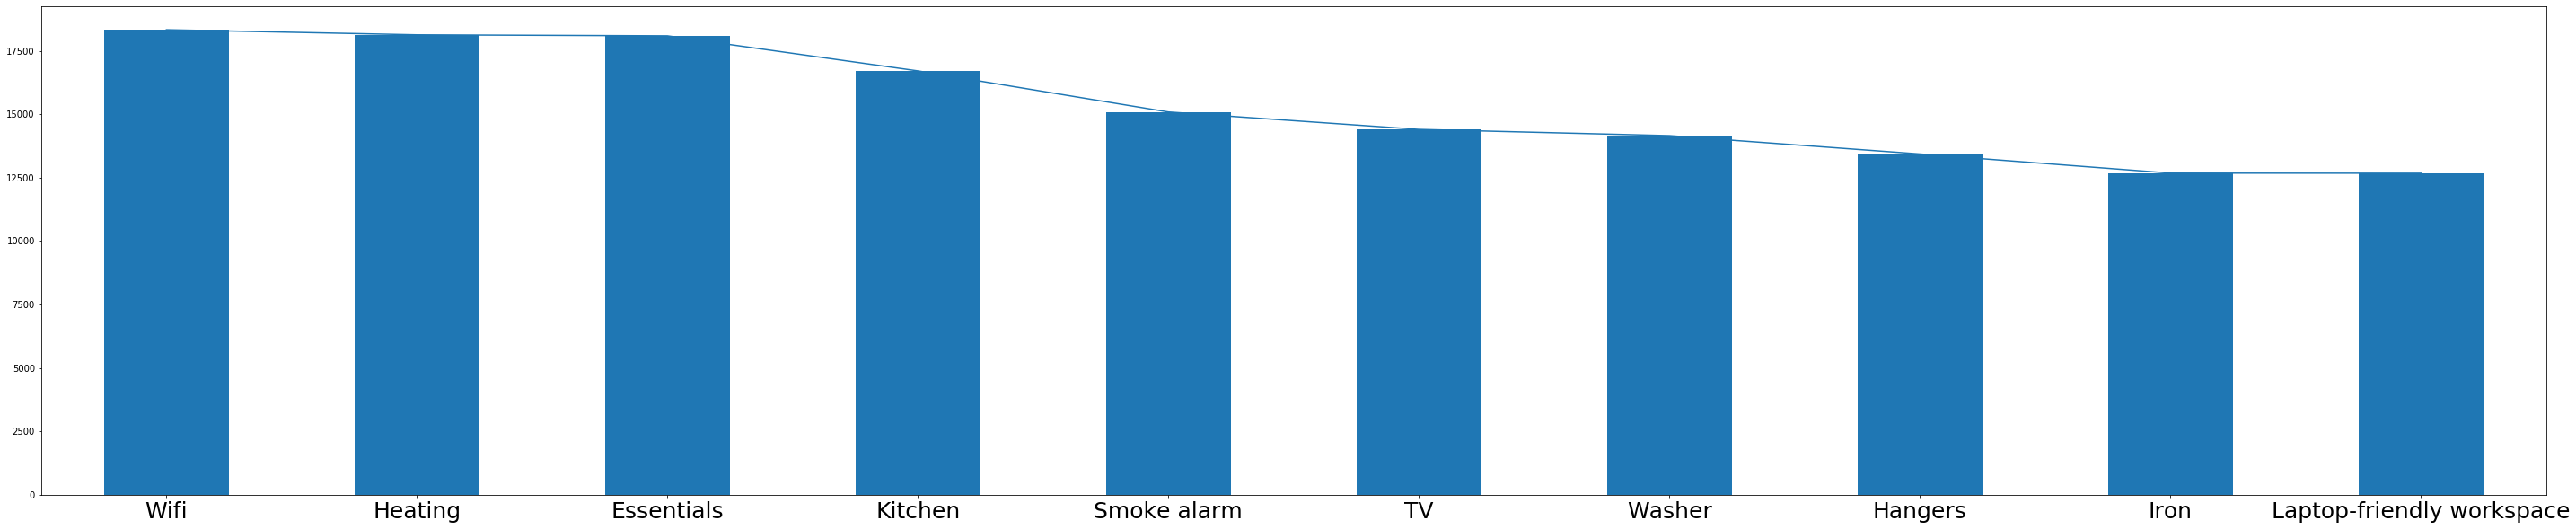

In [25]:
df_r.plot(figsize=(50,10))
plt.xticks(fontsize=25)
ax = df_r.plot.bar(x='lab', y='val', rot=0)

**10 least frequent amenities**

In [26]:
print(df_r1)

Rituals conditioner                                  1
BluNode & B&W sound system with Bluetooth and aux    1
Smeg refrigerator                                    1
n.vt. conditioner                                    1
JBL Speakers Bluetooth sound system                  1
House brand body soap                                1
HDTV with Netflix, premium cable                     1
UE Boom Speaker Bluetooth sound system               1
Bang en Olufsen Bluetooth sound system               1
bang & oluffsen sound system with aux                1
Name: amenities, dtype: int64


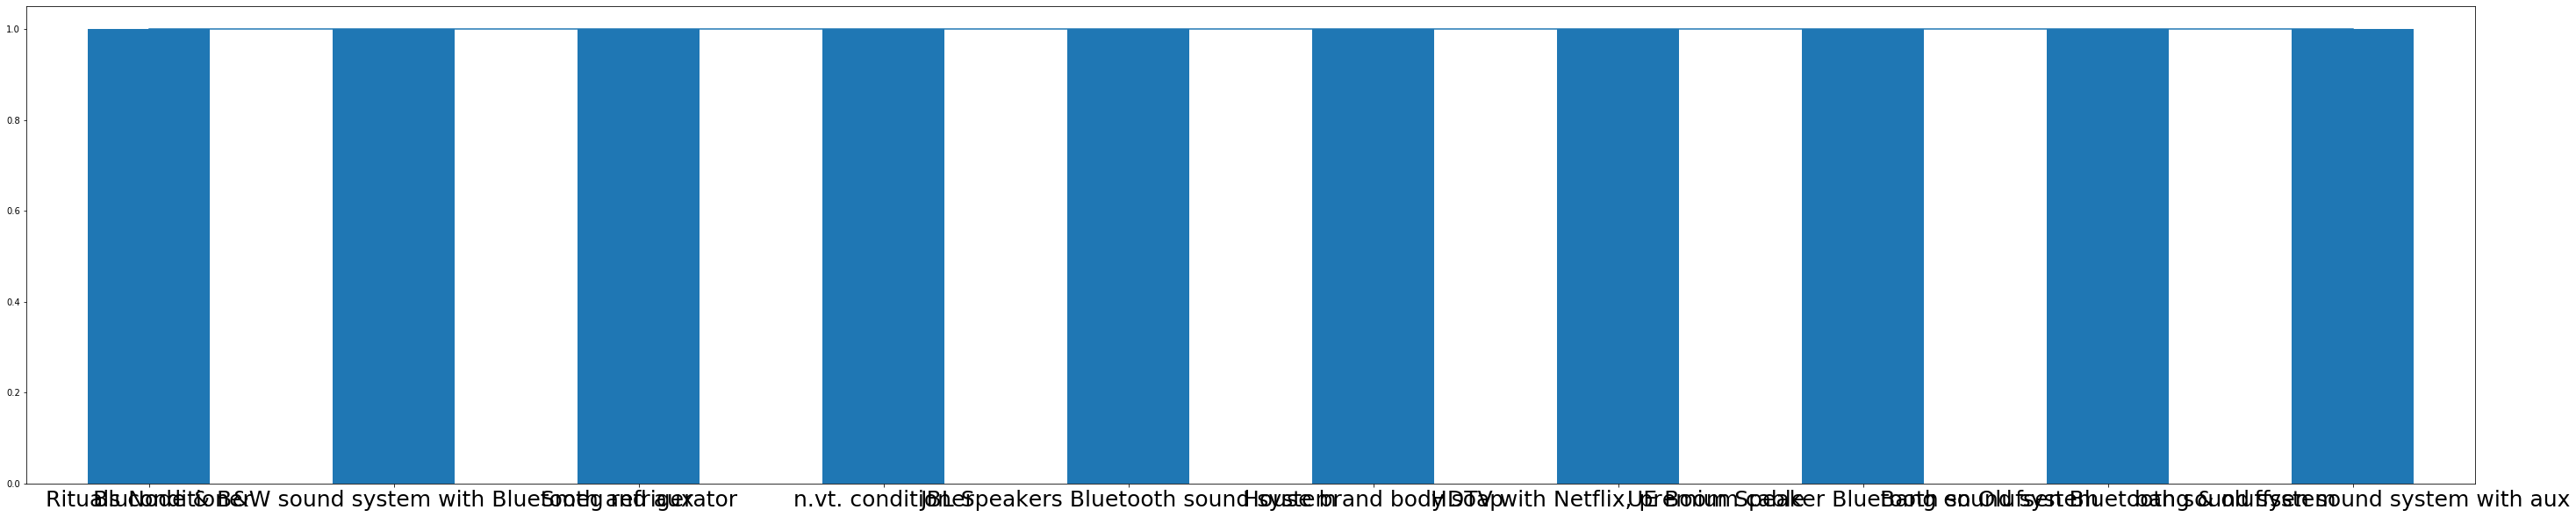

In [27]:
df_r1.plot(figsize=(50,10))
plt.xticks(fontsize=25)
ax = df_r1.plot.bar(x='lab', y='val', rot=0)